In [1]:
from collections import namedtuple
import re
import pdfplumber
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re


In [2]:
df=pd.read_csv('data (1).csv')

In [3]:
df=df.set_index('Sr. No.')

In [4]:
df

,State,Total,Bridge Persons Killed,Culvert Persons Killed,Pot Holes Persons Killed,Steep Grade Persons Killed,Under Construction Persons Killed,Others Persons Killed
Sr. No.,,,,,,,,
1,Andhra Pradesh,"3,114",268,121,32,15,96,414
2,Arunachal Pradesh,54,15,13,6,13,19,29
3,Assam,"1,690",229,119,93,63,123,296
4,Bihar,"3,436",178,206,0,102,16,602
5,Chhattisgarh,"1,421",158,143,28,24,84,818
6,Goa,107,1,0,1,0,0,0
7,Gujarat,"1,898",270,135,5,117,102,2
8,Haryana,"1,901",216,150,20,88,151,"1,698"
9,Himachal Pradesh,487,20,0,16,54,19,2


In [5]:
df.shape

(36, 8)

In [6]:
df.columns

Index(['State', 'Total', 'Bridge Persons Killed', 'Culvert Persons Killed',
       'Pot Holes Persons Killed', 'Steep Grade Persons Killed',
       'Under Construction Persons Killed', 'Others Persons Killed'],
      dtype='object')

In [7]:
df.dtypes

State                                object
Total                                object
Bridge Persons Killed                object
Culvert Persons Killed               object
Pot Holes Persons Killed             object
Steep Grade Persons Killed            int64
Under Construction Persons Killed    object
Others Persons Killed                object
dtype: object

In [8]:
df.replace(',','',regex=True,inplace=True)

In [9]:
df

,State,Total,Bridge Persons Killed,Culvert Persons Killed,Pot Holes Persons Killed,Steep Grade Persons Killed,Under Construction Persons Killed,Others Persons Killed
Sr. No.,,,,,,,,
1,Andhra Pradesh,3114,268,121,32,15,96,414
2,Arunachal Pradesh,54,15,13,6,13,19,29
3,Assam,1690,229,119,93,63,123,296
4,Bihar,3436,178,206,0,102,16,602
5,Chhattisgarh,1421,158,143,28,24,84,818
6,Goa,107,1,0,1,0,0,0
7,Gujarat,1898,270,135,5,117,102,2
8,Haryana,1901,216,150,20,88,151,1698
9,Himachal Pradesh,487,20,0,16,54,19,2


In [41]:
df['Total']=df['Total'].astype('int64')
df['Bridge Persons Killed']=df['Bridge Persons Killed'].astype('int64')
df['Culvert Persons Killed']=df['Culvert Persons Killed'].astype('int64')
df['Pot Holes Persons Killed']=df['Pot Holes Persons Killed'].astype('int64')
df['Under Construction Persons Killed']=df['Under Construction Persons Killed'].astype('int64')
df['Others Persons Killed']=df['Others Persons Killed'].astype('int64')


In [21]:
df.dtypes

State                                object
Total                                 int64
Bridge Persons Killed                 int64
Culvert Persons Killed                int64
Pot Holes Persons Killed              int64
Steep Grade Persons Killed            int64
Under Construction Persons Killed     int64
Others Persons Killed                 int64
dtype: object

In [43]:
#convertind states column into numericals using labelencoder.
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['State']=label_encoder.fit_transform(df['State'])

In [46]:
df

,State,Total,Bridge Persons Killed,Culvert Persons Killed,Pot Holes Persons Killed,Steep Grade Persons Killed,Under Construction Persons Killed,Others Persons Killed
Sr. No.,,,,,,,,
1,1,3114,268,121,32,15,96,414
2,2,54,15,13,6,13,19,29
3,3,1690,229,119,93,63,123,296
4,4,3436,178,206,0,102,16,602
5,6,1421,158,143,28,24,84,818
6,10,107,1,0,1,0,0,0
7,11,1898,270,135,5,117,102,2
8,12,1901,216,150,20,88,151,1698
9,13,487,20,0,16,54,19,2


In [48]:
y=df[['Total']]
x=df.drop('Total',axis=1)

In [49]:
y

,Total
Sr. No.,
1,3114
2,54
3,1690
4,3436
5,1421
6,107
7,1898
8,1901
9,487


In [50]:
x

,State,Bridge Persons Killed,Culvert Persons Killed,Pot Holes Persons Killed,Steep Grade Persons Killed,Under Construction Persons Killed,Others Persons Killed
Sr. No.,,,,,,,
1,1,268,121,32,15,96,414
2,2,15,13,6,13,19,29
3,3,229,119,93,63,123,296
4,4,178,206,0,102,16,602
5,6,158,143,28,24,84,818
6,10,1,0,1,0,0,0
7,11,270,135,5,117,102,2
8,12,216,150,20,88,151,1698
9,13,20,0,16,54,19,2


In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=2)

In [52]:
x_train.shape

(28, 7)

In [53]:
x_test.shape

(8, 7)

In [28]:
y_train.shape

(28, 1)

In [29]:
y_test.shape

(8, 1)

In [54]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [64]:
#y_train_pred= prediction of target data data x_train.
#if y_train and y_pred_train have close accuracy we can say that out model performed well.
#checking for training data
y_train_pred=lr.predict(x_train)

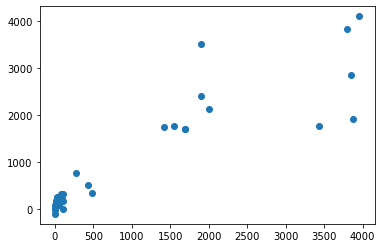

In [70]:
plt.scatter(y_train,y_train_pred) 

<AxesSubplot:xlabel='Total'>

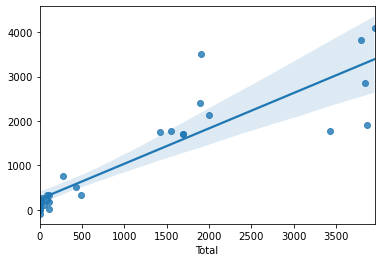

In [71]:
sns.regplot(y_train,y_train_pred)

In [76]:
#Checking for testing data
y_test_pred=lr.predict(x_test)

In [79]:
#lets look at some metrics
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
print("r2_score of train data is",r2_score(y_train,y_train_pred))
print("r2_score of test data is",r2_score(y_test,y_test_pred))
print("root mean squared error of train data is",np.sqrt(mean_squared_error(y_train,y_train_pred)))
print("root mean squared error of train data is",np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2_score of train data is 0.7969658872358254
r2_score of test data is 0.11324497911267228
root mean squared error of train data is 631.2440535750372
root mean squared error of train data is 2422.3169457179815


In [80]:
#stats model
#checking for important coefficients
import statsmodels.api as sm
endog = df['Total']
exog = sm.add_constant(df.drop(['Total'],axis=1))

# Fit and summarize OLS model
mod = sm.OLS(endog, exog)
results = mod.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     28.68
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           3.70e-11
Time:                        20:31:34   Log-Likelihood:                -283.77
No. Observations:                  36   AIC:                             583.5
Df Residuals:                      28   BIC:                             596.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [81]:
#By using stats models we can get to know the features that can be removed so that we can improve accuracy.